In [1]:
import torch
import FISHcreation
import numpy as np
from FISHcreation.src.preprocess import get_cell_background
from FISHcreation.src.signals import create_FISH
from FISHcreation.src.process_boxes import merge_boxes_by_labels
from FISHcreation.src.utils import dataset_from_bboxes
from CellPatchExtraction import extract_patches

#debug
from cellplot.patches import gridPlot, draw_boxes_on_patch

FISHcreation.__version__

'version 0.1'

In [12]:
background = get_cell_background("/home/simon_g/src/FISHcreation/testdata/IF_RGB.TIFF", normalize=False)[:700, :700]
print(background.shape)

(700, 700, 3)


In [13]:
patches, masks, _, _, _ = extract_patches(background, "CP_TU", patch_size=128, return_all=True, device=torch.device("cuda:3"))
len(patches)

120

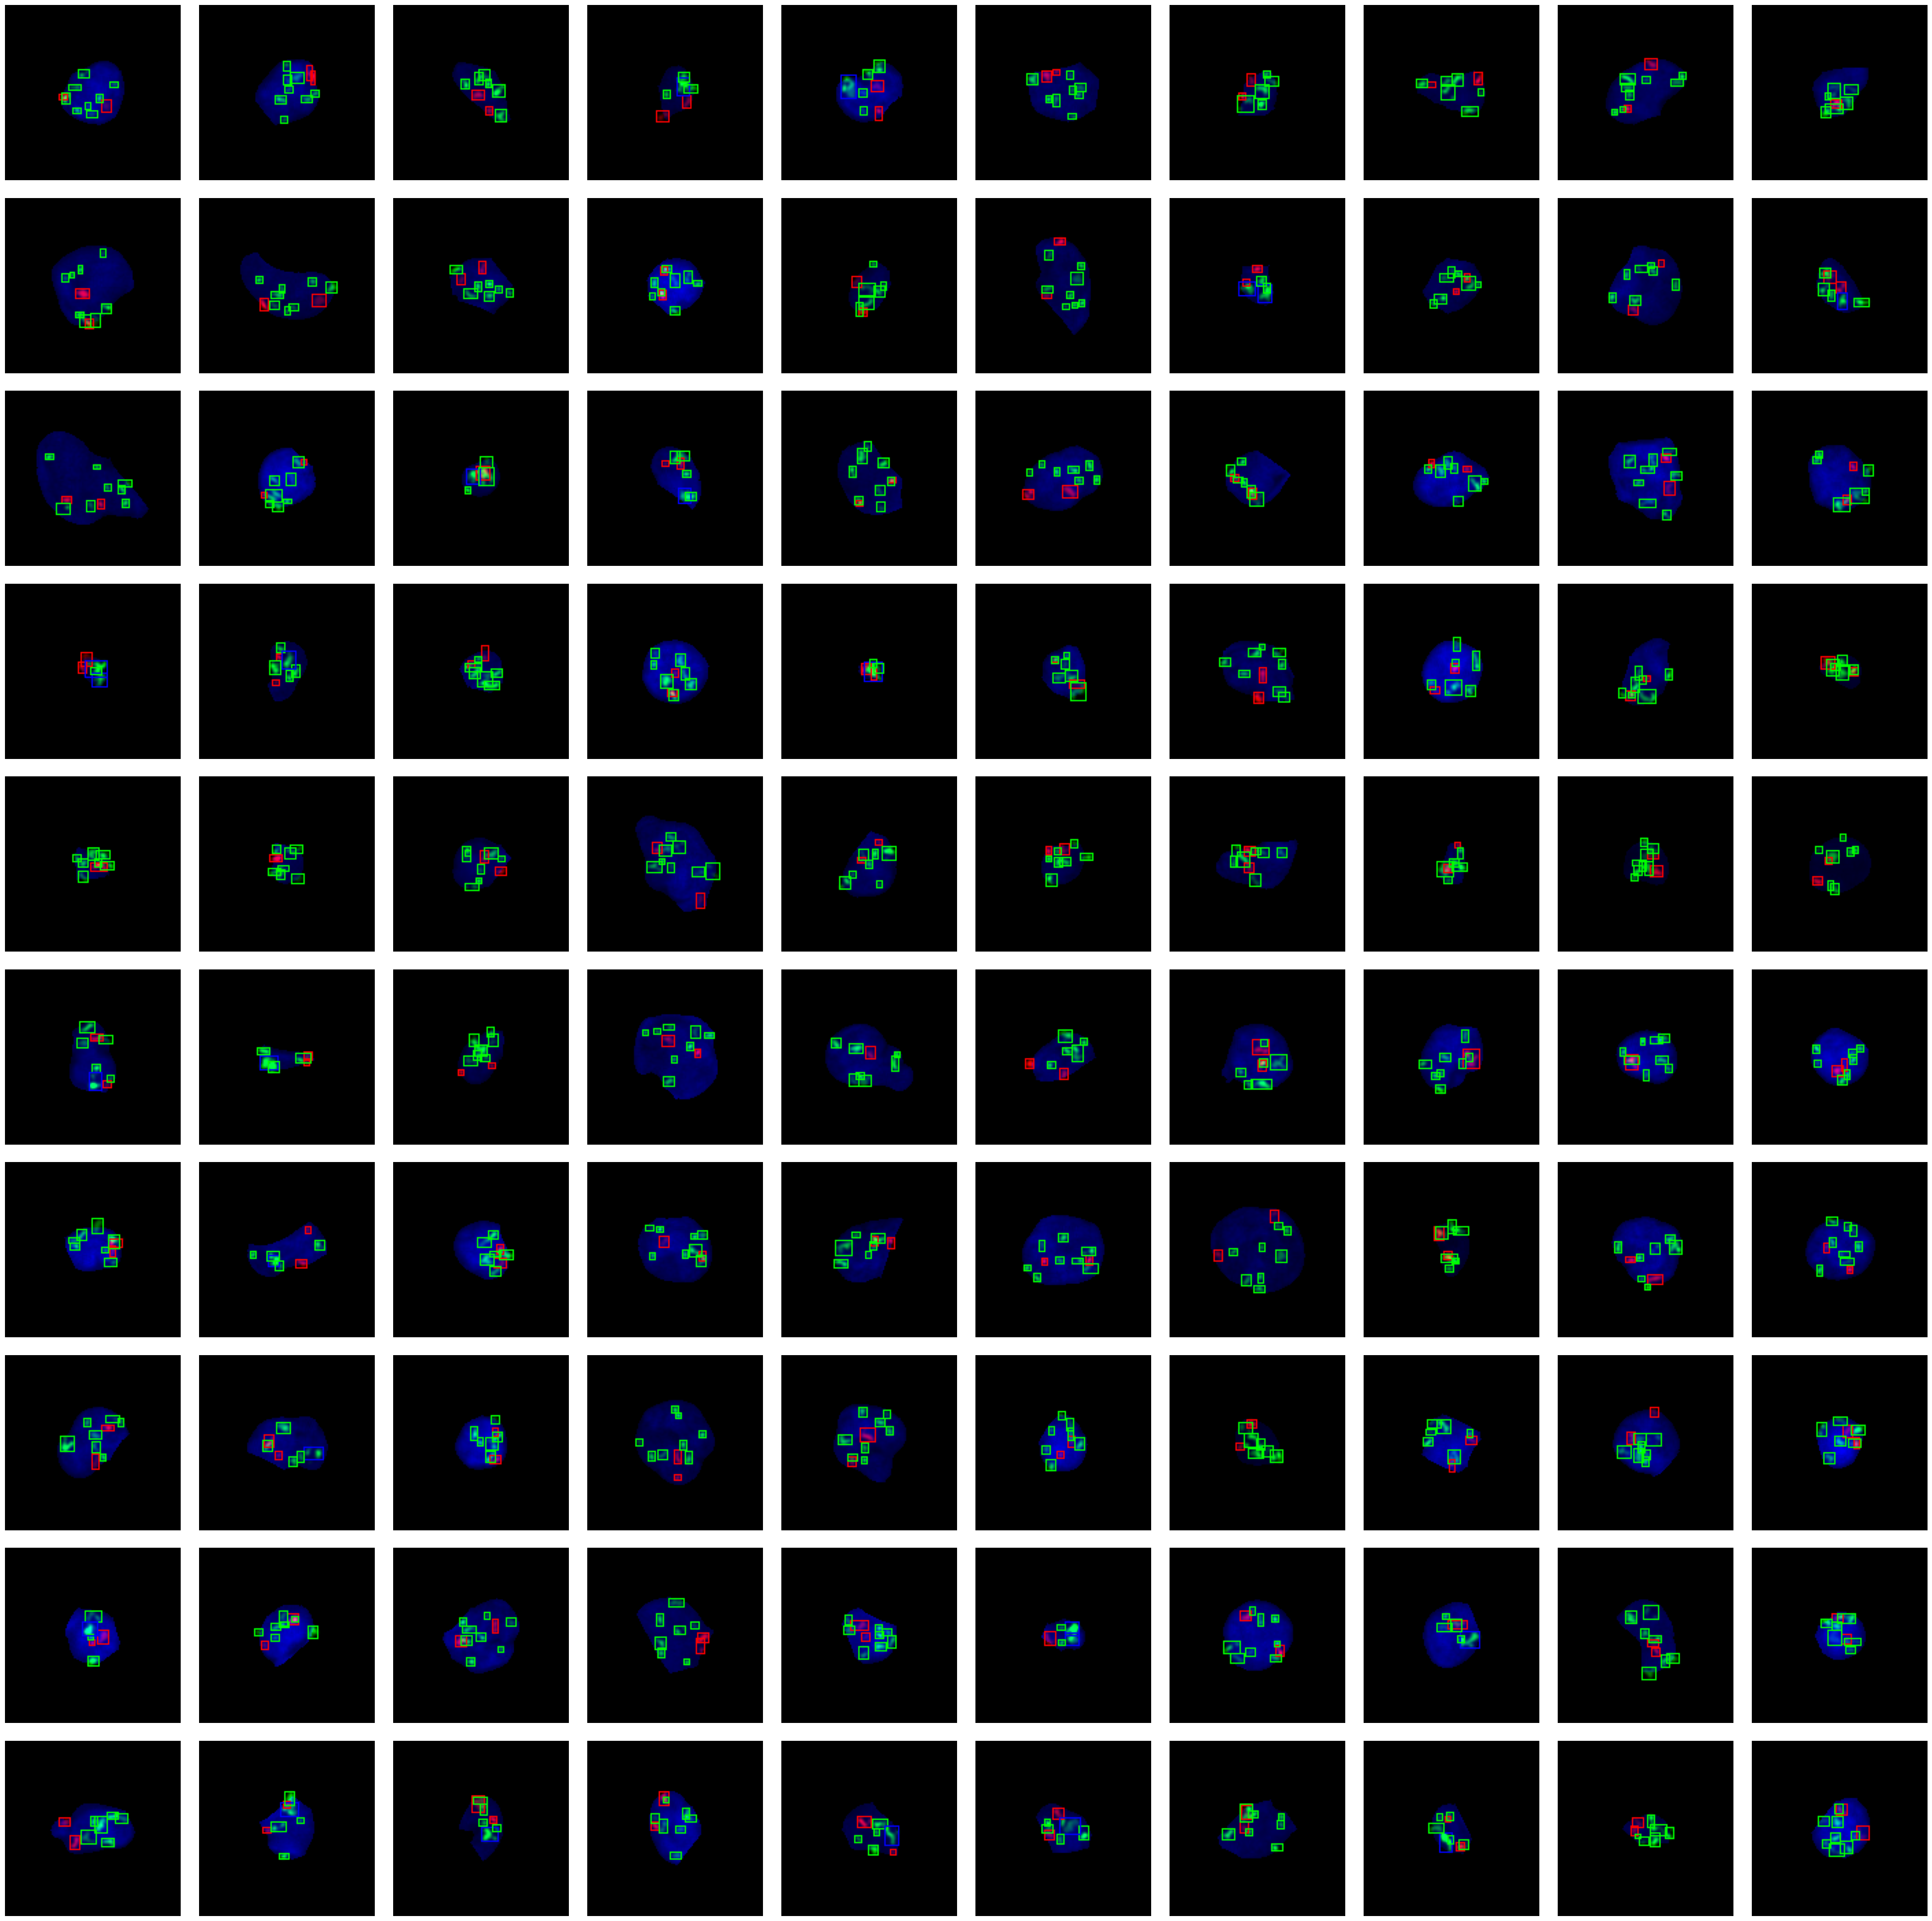

In [14]:
patches_with_boxes = []
bbox_dataset = []
for patch, mask in zip(patches, masks):
    FISH_dict = create_FISH(patch.copy(), mask.copy(), num_red=2, num_green=8, return_as_dict=True)
    bbox_img = draw_boxes_on_patch(FISH_dict["patch"].copy(), FISH_dict["bboxes"], FISH_dict["labels"])
    patches_with_boxes.append(bbox_img)
    bbox_dataset.append(FISH_dict)
    
gridPlot(patches_with_boxes, plot_size=(50,50))

dataset_from_bboxes(bbox_dataset=bbox_dataset, filepath="/home/simon_g/src/FISHcreation/testdata/bbox_dataset.h5")

In [17]:
#create whole dataset
background = get_cell_background("/home/simon_g/src/FISHcreation_package/testdata/IF_RGB.TIFF", normalize=False)[:2000, :2000]

In [18]:
patches, masks, _, _, _ = extract_patches(background, "CP_TU", patch_size=128, return_all=True, device=torch.device("cuda:3"))
len(patches)

1233

In [19]:
created = []
patches_with_boxes = []
while len(created) < 5000:
    
    for patch, mask in zip(patches, masks):
        n_green = np.random.randint(2, 30, 1)[0]
        FISH_dict = create_FISH(patch.copy(), mask.copy(), num_red=2, num_green=n_green, return_as_dict=True)
        # bbox_img = draw_boxes_on_patch(FISH_dict["patch"].copy(), FISH_dict["bboxes"], FISH_dict["labels"])
        # patches_with_boxes.append(bbox_img)
        created.append(FISH_dict)
        
    for patch, mask in zip(patches, masks):
        n_green = np.random.randint(2, 30, 1)[0]
        FISH_dict = create_FISH(patch.copy(), mask.copy(), num_red=2, num_green=n_green, return_as_dict=True, signal_size=6)
        # bbox_img = draw_boxes_on_patch(FISH_dict["patch"].copy(), FISH_dict["bboxes"], FISH_dict["labels"])
        # patches_with_boxes.append(bbox_img)
        created.append(FISH_dict)
        
gridPlot(patches_with_boxes, plot_size=(50,50))

KeyboardInterrupt: 

In [20]:
dataset_from_bboxes(bbox_dataset=created, filepath="/data_isilon_main/isilon_images/10_MetaSystems/MetaSystemsData/_simon/data/datasets/bbox_dataset.h5")